<a href="https://colab.research.google.com/github/shikha-aggarwal/machine_learning/blob/master/Useful_Snippets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Callback function: stop training the model when it reaches x% accuracy**

In [7]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.6):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

1.14.0
Epoch 1/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.4165 - acc: 0.8467
Reached 60% accuracy so cancelling training!
60000/60000 [==============================] - 99s 2ms/sample - loss: 0.4164 - acc: 0.8467


In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

# Visualize intermediary layers in CNN

(1, 26, 26, 64)
(1, 13, 13, 64)
(1, 11, 11, 64)
(1, 5, 5, 64)


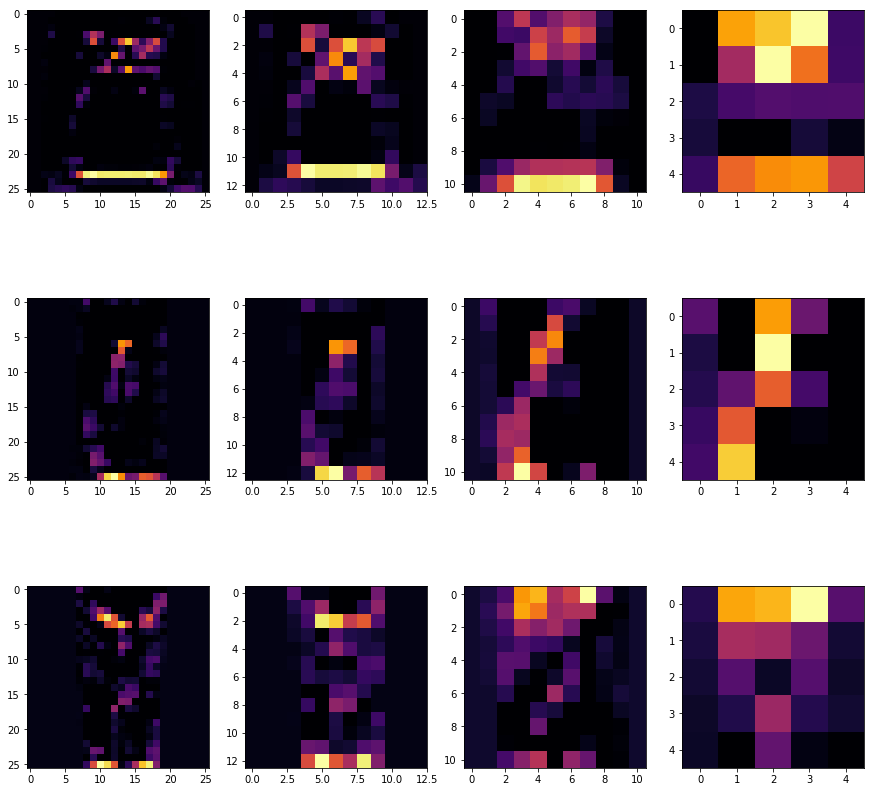

In [10]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3, 4, figsize=(15,15))

FIRST_IMAGE=1
SECOND_IMAGE=2
THIRD_IMAGE=3

CONVOLUTION_NUMBER = 11 # see what the particular filter number has learnt
                       # varies from 0 to number of filters in layers minus 1.

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  print(f1.shape)
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)
  
# for x in range(4,7):
#   f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
#   print(f1.shape)
#   f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
#   print(f2.shape)
#   f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
#   print(f3.shape)
  

## Some filters in their mathematical form: https://lodev.org/cgtutor/filtering.html

## Train model from Image generator - read directory and labels from sub folder names!

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

In [0]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [8]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image Augmentation on the fly.
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Found 1027 images belonging to 2 classes.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/15
8/8 [==============================] - 80s 10s/step - loss: 0.7963 - acc: 0.4805
Epoch 2/15
8/8 [==============================] - 77s 10s/step - loss: 0.7287 - acc: 0.6585
Epoch 3/15
8/8 [==============================] - 77s 10s/step - loss: 0.6162 - acc: 0.6930
Epoch 4/15
8/8 [==============================] - 87s 11s/step - loss: 0.4282 - acc: 0.7920
Epoch 5/15
8/8 [==============================] - 67s 8s/step - loss: 1.0507 - acc: 0.7972
Epoch 6/15
8/8 [==============================] - 77s 10s/step - loss: 0.3011 - acc: 0.8654
Epoch 7/15
8/8 [==============================] - 87s 11s/step - loss: 0.1488 - acc: 0.9473
Epoch 8/15
8/8 [==============================] - 77s 10s/step - loss: 0.1867 - acc: 0.9166
Epoch 9/15
8/8 [==============================] - 77s 10s/step - loss: 1.0989 - acc: 0.8966
Epoch 10/15
8/8 [====================

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 64)       